In [5]:
#task1
import pandas as pd 
dataset_df = pd.read_csv("hypothetical_dataset.csv")
print(dataset_df.head())
print(dataset_df.describe())
print(dataset_df.dtypes)

   Age        Income  Education Level  Health Score  Distance to Work
0   58  49975.460500                1     76.849008         21.666447
1   71  43609.514922                1     64.470349         19.776150
2   48  69131.948730                2     77.076493          5.482868
3   34  48626.509090                2     85.599406          6.458661
4   62  64056.087805                3     56.204394         12.330952
               Age        Income  Education Level  Health Score  \
count  1000.000000   1000.000000      1000.000000   1000.000000   
mean     50.200000  51155.824858         3.025000     75.577445   
std      17.372905  15882.096668         1.417881      9.971996   
min      20.000000   8230.465328         1.000000     41.131862   
25%      36.000000  40659.182135         2.000000     68.709145   
50%      51.000000  50976.922295         3.000000     76.038680   
75%      66.000000  62213.440056         4.000000     82.449601   
max      79.000000  97510.575081         5.0

In [6]:
# TASK 2
missing_values = dataset_df.isnull().sum()
print("Missing values: \n", missing_values)
dataset_df = dataset_df.fillna(dataset_df.mean())
dataset_df['Education Level'] = dataset_df['Education Level'].astype('category')
print(dataset_df.head())

Missing values: 
 Age                 0
Income              0
Education Level     0
Health Score        0
Distance to Work    0
dtype: int64
   Age        Income Education Level  Health Score  Distance to Work
0   58  49975.460500               1     76.849008         21.666447
1   71  43609.514922               1     64.470349         19.776150
2   48  69131.948730               2     77.076493          5.482868
3   34  48626.509090               2     85.599406          6.458661
4   62  64056.087805               3     56.204394         12.330952


Correlations: 
                        Age    Income  Education Level  Health Score  \
Age               1.000000 -0.007988        -0.006746      0.011111   
Income           -0.007988  1.000000         0.004820     -0.014344   
Education Level  -0.006746  0.004820         1.000000     -0.046613   
Health Score      0.011111 -0.014344        -0.046613      1.000000   
Distance to Work  0.019345  0.005691        -0.037663      0.007367   

                  Distance to Work  
Age                       0.019345  
Income                    0.005691  
Education Level          -0.037663  
Health Score              0.007367  
Distance to Work          1.000000  


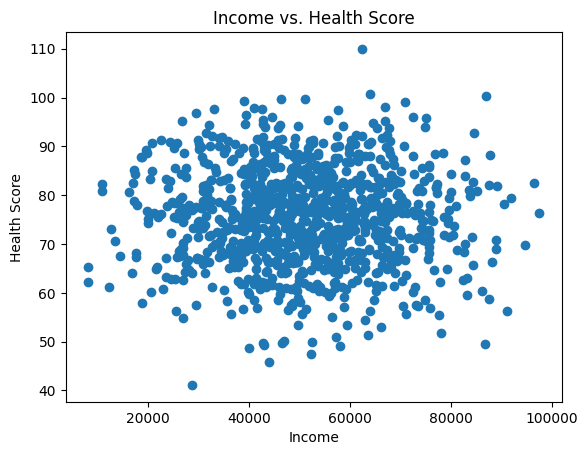

Age
(20, 30]    75.947465
(30, 40]    74.666838
(40, 50]    76.581878
(50, 60]    75.333687
(60, 70]    75.856249
(70, 80]    75.299088
(80, 90]          NaN
Name: Health Score, dtype: float64
Age
(20, 30]    50750.413493
(30, 40]    51896.553719
(40, 50]    51260.237064
(50, 60]    51858.602156
(60, 70]    51454.465277
(70, 80]    49764.156505
(80, 90]             NaN
Name: Income, dtype: float64


In [7]:
#task3
import pandas as pd
import matplotlib.pyplot as plt
dataset_df = pd.read_csv("hypothetical_dataset.csv")
correlations = dataset_df.corr(numeric_only=True)  
print("Correlations: \n", correlations)
plt.scatter(dataset_df['Income'], dataset_df['Health Score'])
plt.xlabel('Income')
plt.ylabel('Health Score')
plt.title('Income vs. Health Score')
plt.show()
age_ranges = pd.cut(dataset_df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
grouped_data = dataset_df.groupby(age_ranges)
print(grouped_data['Health Score'].mean())
print(grouped_data['Income'].mean())


<Figure size 800x600 with 0 Axes>

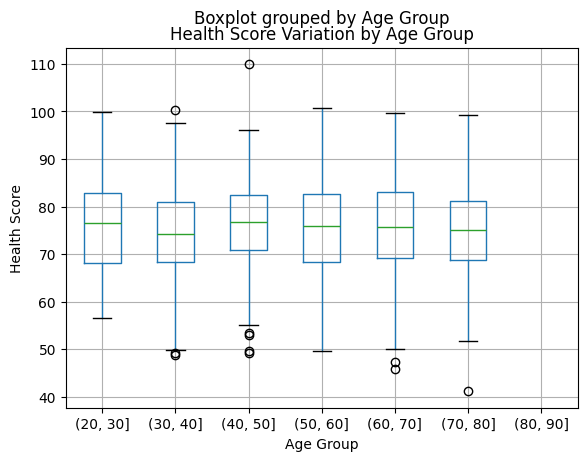

Correlations for the new feature: 
               Health Score
Health Score           1.0


In [9]:
#task 4
dataset_df['Age Group'] = pd.cut(dataset_df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
plt.figure(figsize=(8, 6))
dataset_df.boxplot(column='Health Score', by='Age Group')
plt.xlabel('Age Group')
plt.ylabel('Health Score')
plt.title('Health Score Variation by Age Group')
plt.show()
new_correlations = dataset_df[['Age Group', 'Health Score']].corr(numeric_only=True) 
print("Correlations for the new feature: \n", new_correlations)


In [10]:
#task 5
import scipy.stats as stats
education_levels = dataset_df['Education Level'].unique()
education_groups = [dataset_df[dataset_df['Education Level'] == level]['Income'] for level in education_levels]
f_statistic, p_value = stats.f_oneway(*education_groups)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
mean_income_by_education = dataset_df.groupby('Education Level')['Income'].mean()
print("Mean income by education level: \n", mean_income_by_education)
mean_health_by_education = dataset_df.groupby('Education Level')['Health Score'].mean()
print("Mean health score by education level: \n", mean_health_by_education)


F-Statistic: 0.24216663310527037
P-Value: 0.91443456020521
Mean income by education level: 
 Education Level
1    50632.252057
2    51690.259409
3    51561.159289
4    50525.045817
5    51469.243250
Name: Income, dtype: float64
Mean health score by education level: 
 Education Level
1    75.783783
2    77.067381
3    74.848703
4    75.489818
5    74.859034
Name: Health Score, dtype: float64


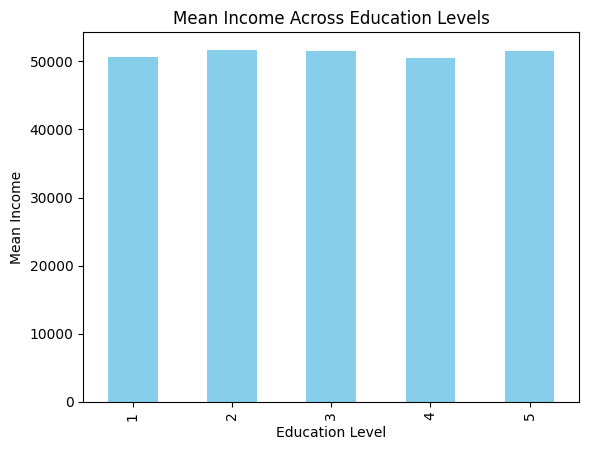

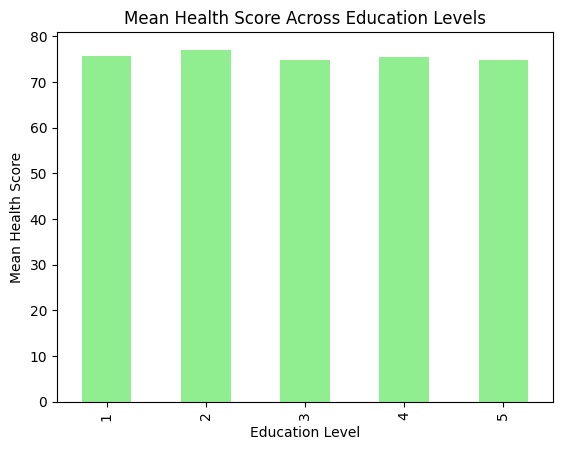

In [13]:
#task 6
import matplotlib.pyplot as plt
mean_income_by_education.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Mean Income')
plt.title('Mean Income Across Education Levels')
plt.show()
mean_health_by_education.plot(kind='bar', color='lightgreen')
plt.xlabel('Education Level')
plt.ylabel('Mean Health Score')
plt.title('Mean Health Score Across Education Levels')
plt.show()
